In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split

### Read the data

In [2]:
df  = pd.read_csv('AAPL.csv')

### Describe 


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10409.000000,10409.000000,10409.000000,10409.000000,10409.000000,1.040900e+04
mean,13.959910,14.111936,13.809163,13.966757,13.350337,3.321778e+08
std,30.169244,30.514878,29.835055,30.191696,29.911132,3.393344e+08
min,0.049665,0.049665,0.049107,0.049107,0.038384,0.000000e+00
25%,0.281964,0.287946,0.274554,0.281250,0.234799,1.247604e+08
50%,0.468750,0.477679,0.459821,0.468750,0.386853,2.199680e+08
75%,14.217857,14.364286,14.043571,14.206071,12.188149,4.126108e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,7.421641e+09


In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...,...
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700


In [5]:
df[df.isna()].sum() # no NA 

Date           0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: object

In [6]:
df['Moving_Avg'] = df['Close'].rolling(window=30).mean()

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

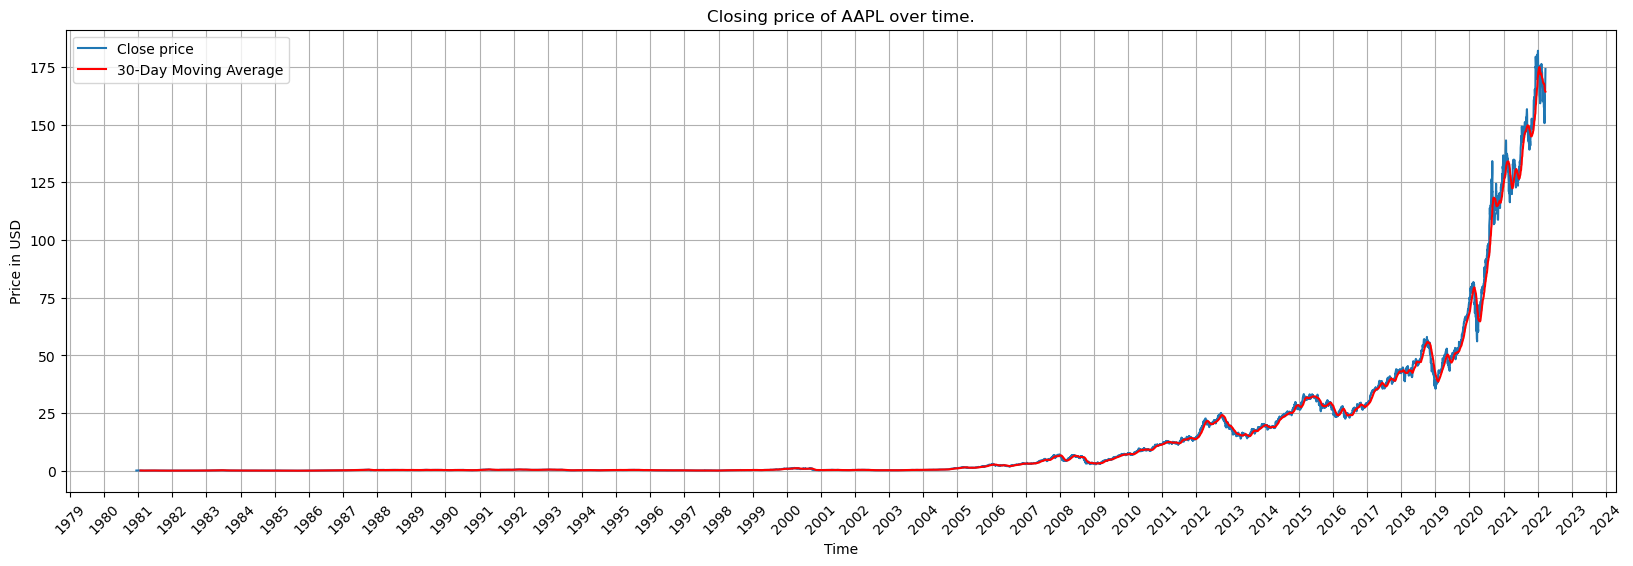

In [8]:
plt.figure(figsize=(20,6))
plt.plot(df['Date'], df['Close'], label = 'Close price')
plt.plot(df['Date'], df['Moving_Avg'], color='red', label='30-Day Moving Average')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.title("Closing price of AAPL over time.")
plt.legend()
plt.show()

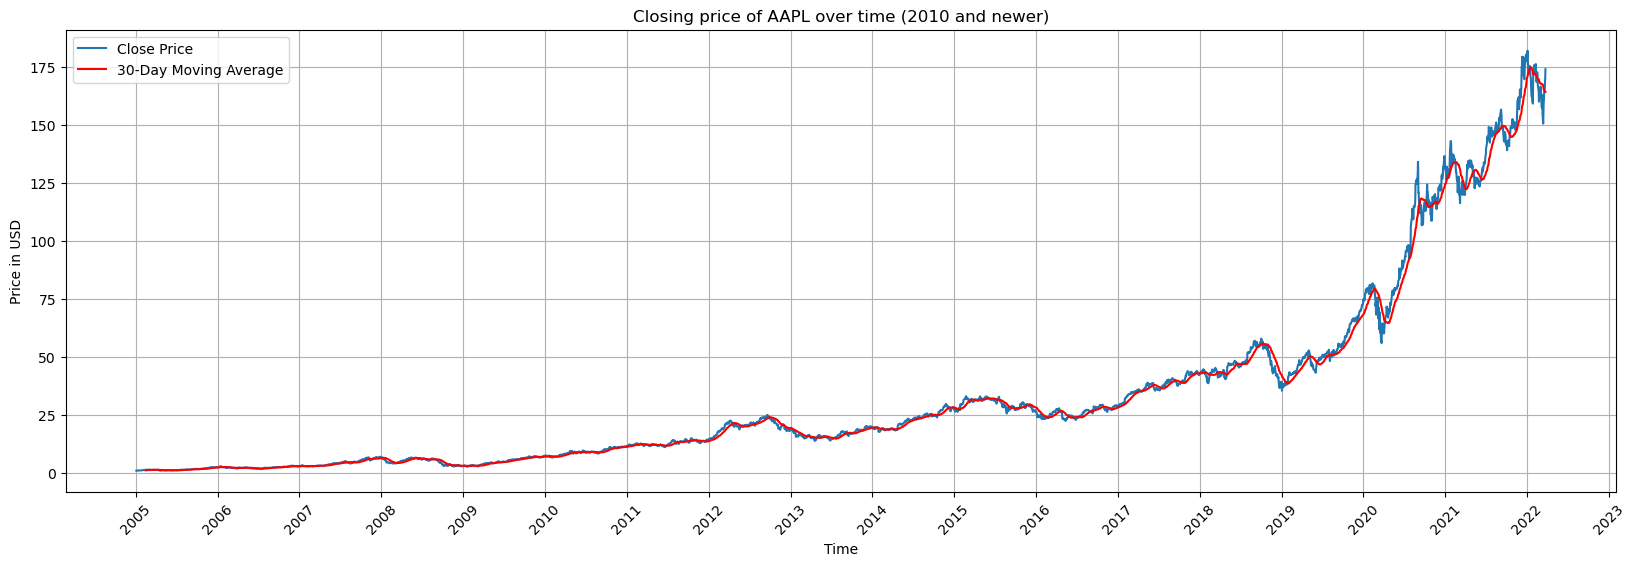

In [9]:
df_new = df[df['Date'] >= '2005-01-01'].copy()
df_new['Moving_Avg'] = df_new['Close'].rolling(window=30).mean()

plt.figure(figsize=(20, 6))
plt.plot(df_new['Date'], df_new['Close'], label='Close Price')
plt.plot(df_new['Date'], df_new['Moving_Avg'], color='red', label='30-Day Moving Average')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.title("Closing price of AAPL over time (2010 and newer)")

plt.legend()
plt.show()

In [10]:
df = df[df['Date'] >= '2010-01-01']

In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Moving_Avg
7331,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.544689,493729600,7.150536
7332,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.556005,601904800,7.167048
7333,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.451723,552160000,7.180202
7334,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.439794,477131200,7.185798
7335,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.482609,447610800,7.194774
...,...,...,...,...,...,...,...,...
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200,164.847333
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400,164.613667
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000,164.519000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700,164.365000


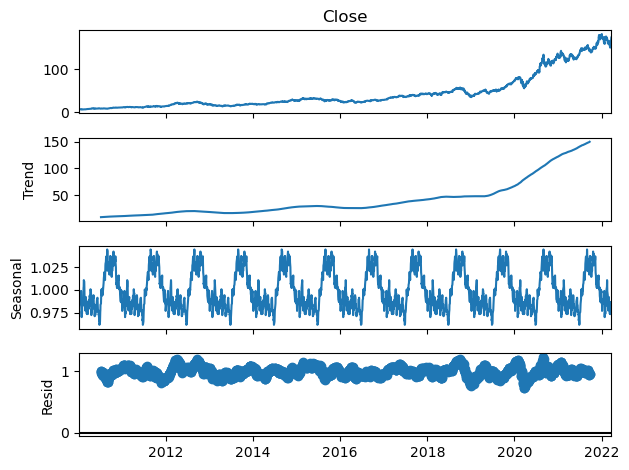

Date
2010-01-04    0.982964
2010-01-05    0.984074
2010-01-06    0.988281
2010-01-07    0.988293
2010-01-08    0.987386
                ...   
2022-03-18    0.986686
2022-03-21    0.982149
2022-03-22    0.973378
2022-03-23    0.980122
2022-03-24    0.980895
Name: seasonal, Length: 3078, dtype: float64


In [18]:
# df.set_index('Date', inplace=True)
res = sm.tsa.seasonal_decompose(df['Close'], model='multiplicative', period=252)
res.plot()
plt.show()

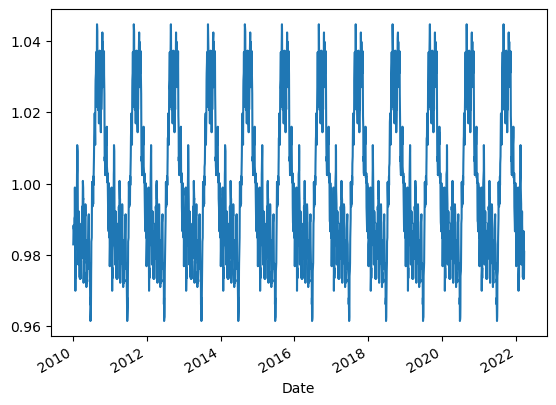

In [20]:
res.seasonal.plot()
plt.show()

### Testing ACF and PACF


- ACF decays slowly
- PACF cuts off sharply at lag 1


-> autoregressive process AR(1) 

<Figure size 1000x600 with 0 Axes>

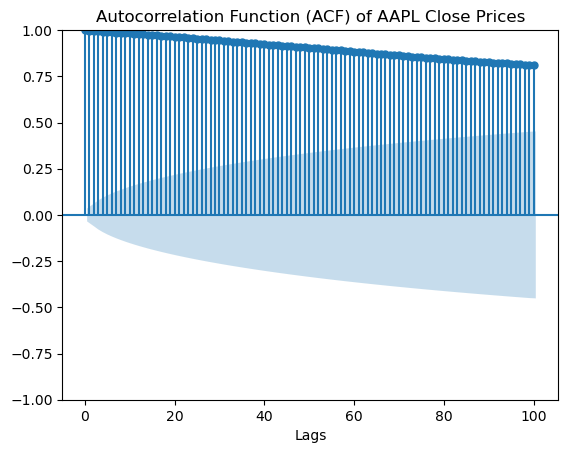

<Figure size 1200x600 with 0 Axes>

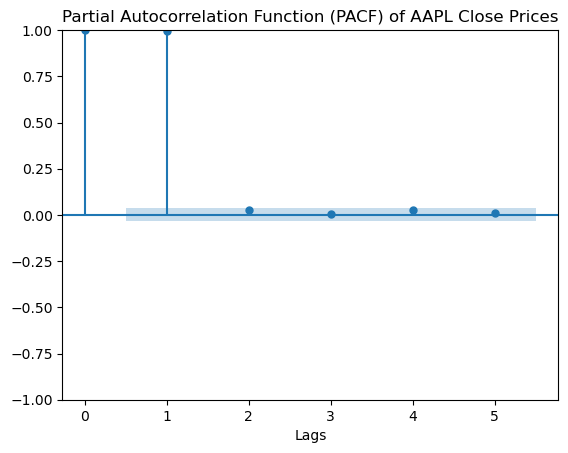

In [13]:
#Plot ACF
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_acf(df['Close'], lags=100)
plt.title('Autocorrelation Function (ACF) of AAPL Close Prices')
plt.xlabel('Lags')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(df['Close'], lags=5)
plt.title('Partial Autocorrelation Function (PACF) of AAPL Close Prices')
plt.xlabel('Lags')
plt.show()

In [25]:
def test_stationarity(df, col):
    result = sm.tsa.adfuller(df[col])
    
    adf_statistic = result[0]
    p_value = result[1]
    used_lag = result[2]
    n_obs = result[3]
    critical_values = result[4]
    ic_best = result[5]
    
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print(f'Used Lag: {used_lag}')
    print(f'Number of Observations Used: {n_obs}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value}')
    print(f'Best Information Criterion: {ic_best}')
    
    # Interpret the result
    if p_value < 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is not stationary.")

In [24]:
test_stationarity(df)

ADF Statistic: 2.7892135247388468
p-value: 1.0
Used Lag: 29
Number of Observations Used: 3048
Critical Values:
   1%: -3.432497249267698
   5%: -2.862488718312822
   10%: -2.5672750267676925
Best Information Criterion: 9489.53178750213
The time series is not stationary.


In [27]:
df['Close_diff'] = df['Close'] - df['Close'].shift()
test_stationarity(df.dropna(), 'Close_diff')

ADF Statistic: -11.216313308527523
p-value: 2.0654321273632158e-20
Used Lag: 29
Number of Observations Used: 3047
Critical Values:
   1%: -3.4324979545720318
   5%: -2.862489029824813
   10%: -2.5672751926125317
Best Information Criterion: 9492.402202139354
The time series is stationary.


C:\Users\vojta\AppData\Local\Temp\ipykernel_34788\927392610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close_diff'] = df['Close'] - df['Close'].shift()
